<a href="https://colab.research.google.com/github/sabumjung/DL-test/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [0]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

In [0]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [48]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
#
model = Sequential()
model.add(SimpleRNN(units=units, dropout=dropout, input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [49]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# train the network
simpleRNN_history=model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test),verbose=2).history
loss, acc= model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

W0904 01:24:54.690642 139753860929408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.8005 - acc: 0.7632 - val_loss: 0.3877 - val_acc: 0.8911
Epoch 2/10
 - 8s - loss: 0.3643 - acc: 0.8915 - val_loss: 0.2188 - val_acc: 0.9356
Epoch 3/10
 - 8s - loss: 0.2679 - acc: 0.9206 - val_loss: 0.1756 - val_acc: 0.9501
Epoch 4/10
 - 8s - loss: 0.2221 - acc: 0.9328 - val_loss: 0.1487 - val_acc: 0.9562
Epoch 5/10
 - 8s - loss: 0.1932 - acc: 0.9425 - val_loss: 0.1378 - val_acc: 0.9597
Epoch 6/10
 - 8s - loss: 0.1773 - acc: 0.9465 - val_loss: 0.1622 - val_acc: 0.9524
Epoch 7/10
 - 8s - loss: 0.1593 - acc: 0.9524 - val_loss: 0.1173 - val_acc: 0.9637
Epoch 8/10
 - 8s - loss: 0.1471 - acc: 0.9558 - val_loss: 0.0950 - val_acc: 0.9710
Epoch 9/10
 - 8s - loss: 0.1389 - acc: 0.9582 - val_loss: 0.0960 - val_acc: 0.9700
Epoch 10/10
 - 8s - loss: 0.1322 - acc: 0.9596 - val_loss: 0.0893 - val_acc: 0.9715
10000/10000 [==============================] - 1s 89us/step

Test accuracy: 97.2%


In [55]:
simpleRNN_history

{'acc': [0.7631666666666667,
  0.8915,
  0.9205666666984558,
  0.9328333333651225,
  0.9424833333015442,
  0.9464833333651225,
  0.9523666666666667,
  0.9558333333015442,
  0.9581666666348775,
  0.9596333333651225],
 'loss': [0.8004776435852051,
  0.36434706177711484,
  0.2678532984654109,
  0.22206266442934672,
  0.19319345789750417,
  0.1772740926424662,
  0.15930479118029275,
  0.14710772656202317,
  0.1389069123586019,
  0.13218222084442774],
 'val_acc': [0.8911,
  0.9356,
  0.9501,
  0.9562,
  0.9597,
  0.9524,
  0.9637,
  0.971,
  0.97,
  0.9715],
 'val_loss': [0.3876746600151062,
  0.21883693885803224,
  0.17564817222356796,
  0.14872390732765198,
  0.13778951908648013,
  0.1622242390036583,
  0.11727728569805622,
  0.09498763573169708,
  0.09603580140694976,
  0.08928517366051673]}

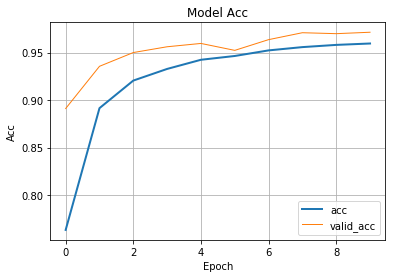

In [60]:
import matplotlib.pyplot as plt
plt.plot(simpleRNN_history['acc'], linewidth=2, label='acc')
plt.plot(simpleRNN_history['val_acc'], linewidth=1, label='valid_acc')
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.grid()
plt.show()

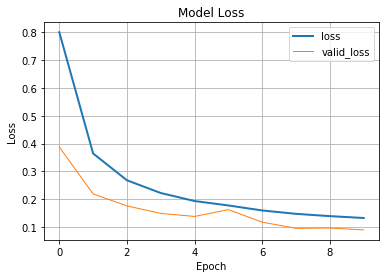

In [61]:
plt.plot(simpleRNN_history['loss'], linewidth=2, label='loss')
plt.plot(simpleRNN_history['val_loss'], linewidth=1, label='valid_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.grid()
plt.show()